In [ ]:
from pathlib import Path
from molencoder.utils.experiment_plotting import analyze_and_plot_five_experiments
from transformers import AutoModelForSequenceClassification

/Users/fabian/miniconda3/envs/encoder/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model1 = AutoModelForSequenceClassification.from_pretrained('fabikru/model_15M_small_ds_masking_30_predicted_hparams')
model2 = AutoModelForSequenceClassification.from_pretrained('DeepChem/ChemBERTa-10M-MLM')
model3 = AutoModelForSequenceClassification.from_pretrained('DeepChem/ChemBERTa-77M-MLM')
model4 = AutoModelForSequenceClassification.from_pretrained('ibm-research/MoLFormer-XL-both-10pct', trust_remote_code=True)

models = [
    ('fabikru/model_15M_small_ds_masking_30_predicted_hparams', model1),
    ('DeepChem/ChemBERTa-10M-MLM', model2),
    ('DeepChem/ChemBERTa-77M-MLM', model3),
    ('ibm-research/MoLFormer-XL-both-10pct', model4)
]

for model_name, model in models:
    model_size = sum(t.numel() for t in model.parameters())
    print(f"Model {model_name} has {model_size:,} parameters")

Some weights of ModernBertForSequenceClassification were not initialized from the model checkpoint at fabikru/model_15M_small_ds_masking_30_predicted_hparams and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-10M-MLM and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MLM and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAI

Model fabikru/model_15M_small_ds_masking_30_predicted_hparams has 15,230,210 parameters
Model DeepChem/ChemBERTa-10M-MLM has 3,428,210 parameters
Model DeepChem/ChemBERTa-77M-MLM has 3,428,210 parameters
Model ibm-research/MoLFormer-XL-both-10pct has 45,557,762 parameters


In [2]:
# Define the paths to the CSV files
csv_paths = [
    'lipophilicity-astrazeneca_comparison_results.csv',
    'adme-novartis-cyp3a4-reg_comparison_results.csv',
    'adme-fang-hclint-1_comparison_results.csv',
    'adme-fang-perm-1_comparison_results.csv', 
    'adme-fang-solu-1_comparison_results.csv',
]

# Define model name mapping for cleaner display names
model_name_mapping = {
    'fabikru/model_15M_small_ds_masking_30_predicted_hparams': 'SmilesEncoder (1M molecules)',
    'DeepChem/ChemBERTa-10M-MLM': 'ChemBERTa (10M molecules)',
    'DeepChem/ChemBERTa-77M-MLM': 'ChemBERTa (77M molecules)',
    'ibm-research/MoLFormer-XL-both-10pct': 'MoLFormer-XL (100M molecules)',
    'ECFP4+XGBoost': 'ECFP4+XGBoost'
}

# Define output directory for plots
output_dir = '/Users/fabian/Code/smilesencoder/plots/comparison_to_other_models/chemberta_and_molformer'


In [3]:
# Custom dataset name transformation function
def transform_dataset_name(csv_path):
    """Transform dataset names from file paths to cleaner display names."""
    dataset_name = Path(csv_path).stem.replace('_comparison_results', '')
    
    # Apply transformations
    transformations = {
        'adme-fang-hclint-1': 'HCLint',
        'adme-fang-perm-1': 'Permeability', 
        'adme-fang-solu-1': 'Solubility',
        'adme-novartis-cyp3a4-reg': 'CYP',
        'lipophilicity-astrazeneca': 'Lipophilicity'
    }
    
    return transformations.get(dataset_name, dataset_name)


Significant differences found for mse with p-value 7.867134341880247e-08
Saved PNG plot for mse to /Users/fabian/Code/smilesencoder/plots/comparison_to_other_models/chemberta_and_molformer/mse_five_datasets_comparison.png
Saved PDF plot for mse to /Users/fabian/Code/smilesencoder/plots/comparison_to_other_models/chemberta_and_molformer/mse_five_datasets_comparison.pdf


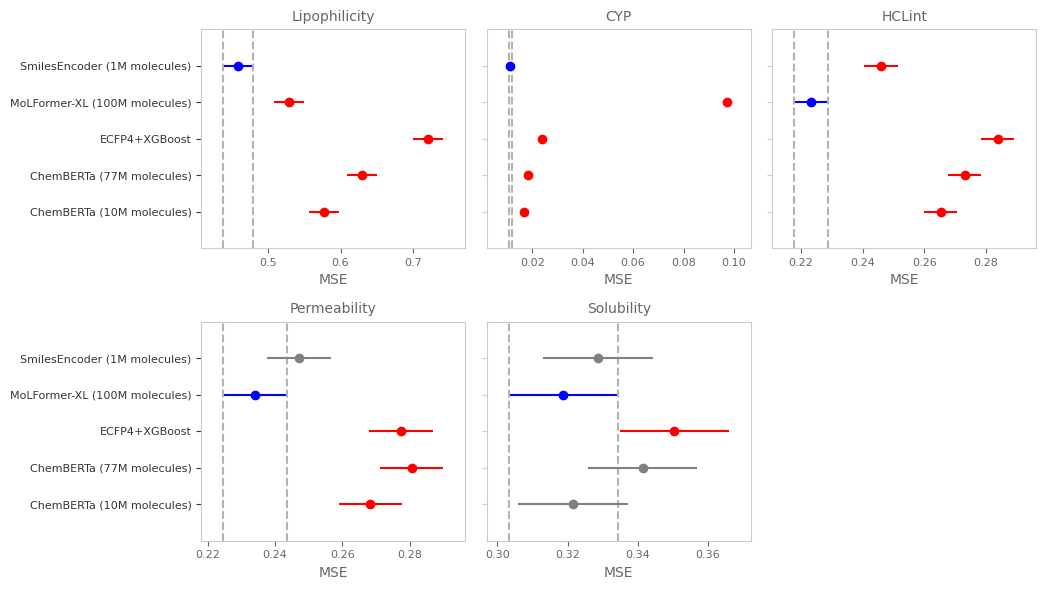

Significant differences found for rho with p-value 6.51122956682977e-09
Saved PNG plot for rho to /Users/fabian/Code/smilesencoder/plots/comparison_to_other_models/chemberta_and_molformer/rho_five_datasets_comparison.png
Saved PDF plot for rho to /Users/fabian/Code/smilesencoder/plots/comparison_to_other_models/chemberta_and_molformer/rho_five_datasets_comparison.pdf


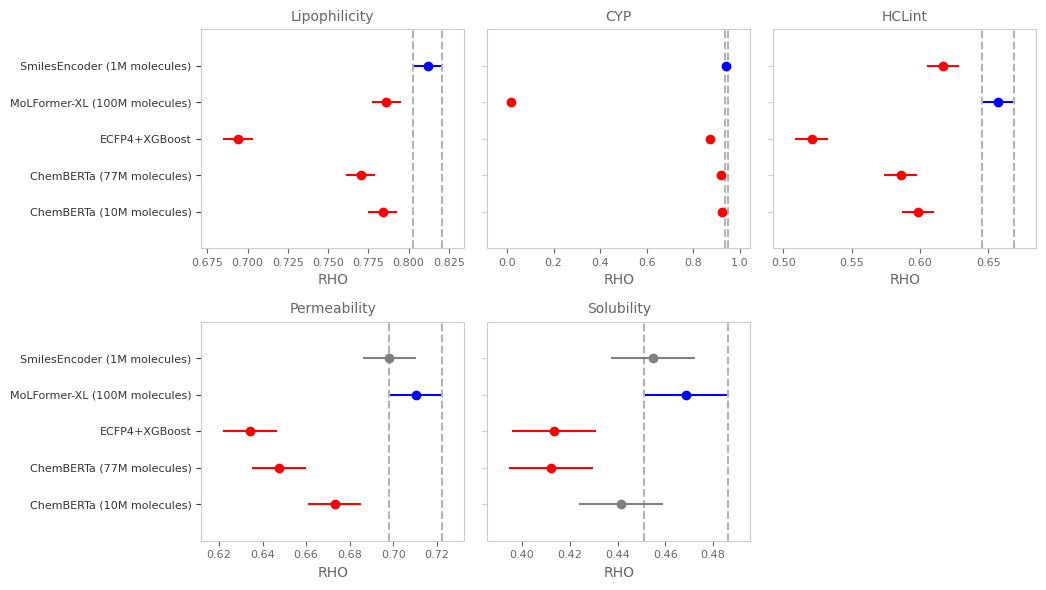

Significant differences found for r2 with p-value 1.3393414352554424e-07
Saved PNG plot for r2 to /Users/fabian/Code/smilesencoder/plots/comparison_to_other_models/chemberta_and_molformer/r2_five_datasets_comparison.png
Saved PDF plot for r2 to /Users/fabian/Code/smilesencoder/plots/comparison_to_other_models/chemberta_and_molformer/r2_five_datasets_comparison.pdf


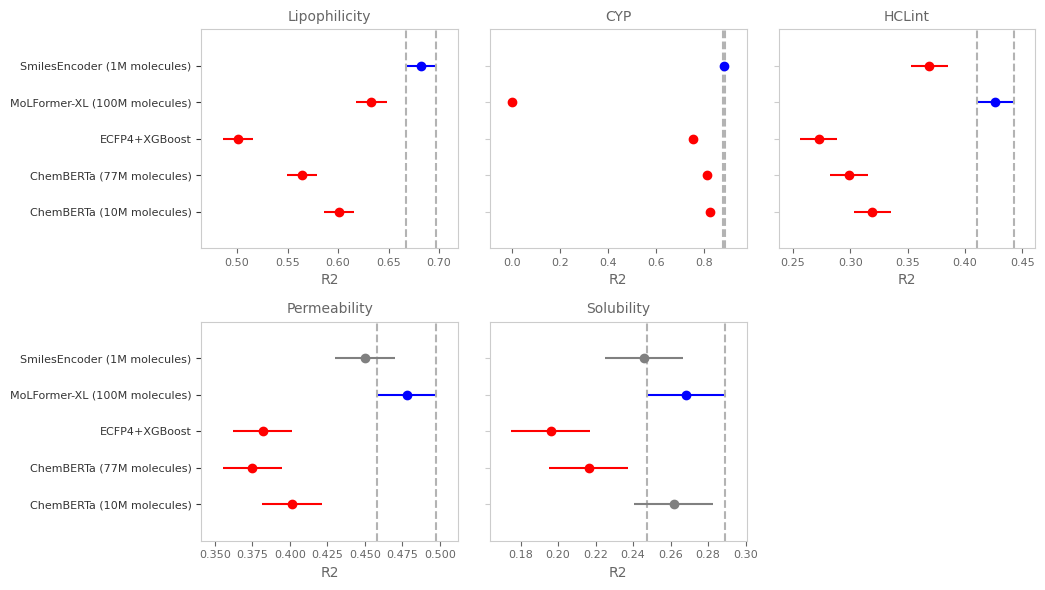

Significant differences found for mae with p-value 6.073734142071146e-05
Saved PNG plot for mae to /Users/fabian/Code/smilesencoder/plots/comparison_to_other_models/chemberta_and_molformer/mae_five_datasets_comparison.png
Saved PDF plot for mae to /Users/fabian/Code/smilesencoder/plots/comparison_to_other_models/chemberta_and_molformer/mae_five_datasets_comparison.pdf


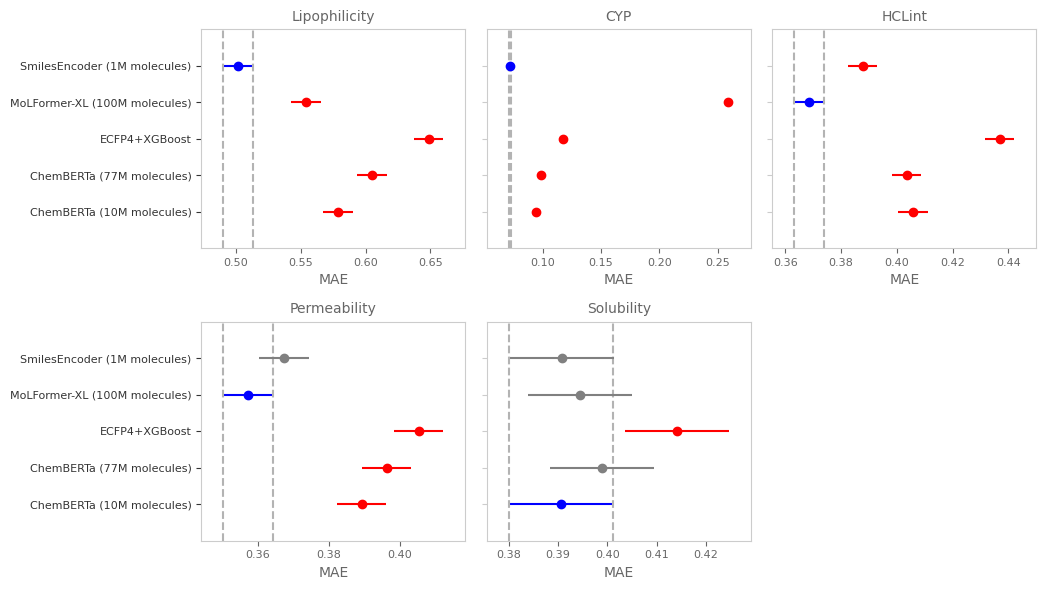

In [4]:
# Run the analysis and create plots for all metrics
analyze_and_plot_five_experiments(
    csv_paths=csv_paths,
    model_name_mapping=model_name_mapping,
    output_dir=output_dir,
    dataset_name_transform=transform_dataset_name,
    y_axis_label=''
)
